In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

print(x_train[0])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 1

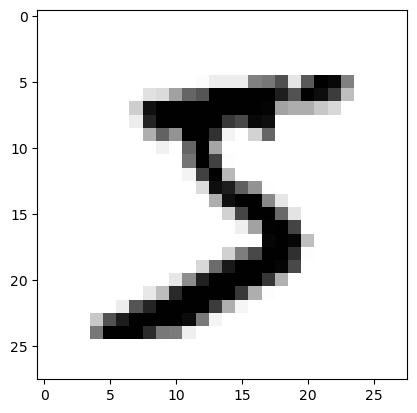

5


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

print(y_train[0])    

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

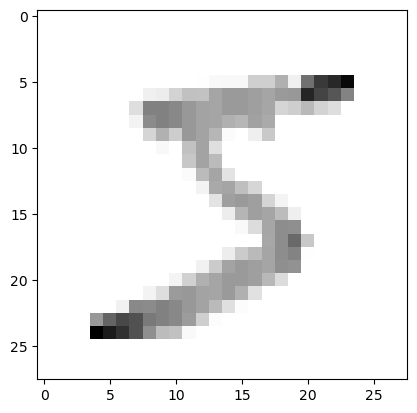

In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

print(x_train[0])

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
#let the first hidden layer greater then second one to get better accuracy.
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2336 - accuracy: 0.9304
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0909 - accuracy: 0.9717
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0617 - accuracy: 0.9800


In [5]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 4s 365us/sample - loss: 0.0902 - acc: 0.9728
0.09023767396658659
0.9728


In [10]:
model.save('kerasNN.model')# it is important to continue the processing without start from the begning. 
new_model = tf.keras.models.load_model('kerasNN.model')
predictions = new_model.predict(x_test)
print(predictions)

INFO:tensorflow:Assets written to: kerasNN.model\assets


INFO:tensorflow:Assets written to: kerasNN.model\assets


313/313 [==============================] - 1s 2ms/step
[[3.7180156e-10 1.6285952e-07 3.0117192e-06 ... 9.9985397e-01
  1.9985825e-07 3.5965074e-06]
 [2.2940909e-10 3.0281398e-04 9.9968946e-01 ... 2.8610033e-08
  1.5425312e-07 1.8291334e-11]
 [3.9139745e-09 9.9991667e-01 6.8148660e-07 ... 6.7032757e-05
  1.1887440e-05 1.4662379e-07]
 ...
 [3.8075185e-12 2.4435477e-07 4.2772313e-10 ... 8.3196335e-07
  3.0526422e-08 1.8256328e-06]
 [2.4745236e-07 1.7552341e-07 2.0720125e-07 ... 7.4088632e-07
  2.6635382e-02 5.1655946e-09]
 [2.0136936e-07 2.8510831e-08 8.1807187e-08 ... 3.5213146e-09
  1.4608198e-08 1.0425596e-09]]


what is the difference between 'softmax' and 'argmax'?
softmax: select the index where wqual to 1.
argmax: select the index which include the greater value.
*softmax array example: {0,0,0,0,0,0,1,0,0}
*argmax array example: {0.1,0.3,0,0,0,0,0.95,0.1,0.1} 

7


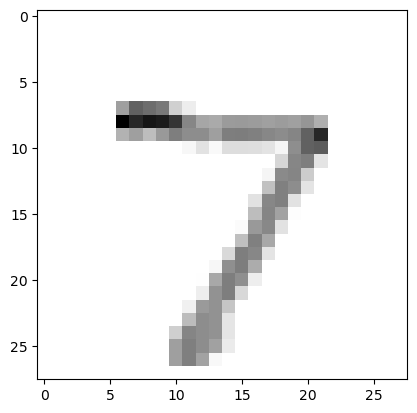

In [11]:
import numpy as np
print(np.argmax(predictions[0])) 
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()